# Plotting Mexican Administrative Boundaries
[Data sources](../data/README.md)

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Boundaries of Mexican States

Read boundary polygons for Mexican states from shapefile

In [11]:
admin1 = gpd.read_file('../data/mex_admbnda_govmex_20210618_SHP/mex_admbnda_adm1_govmex_20210618.shp')

In [12]:
admin1.head(10)

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,None,3.993483,0.491151,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,None,29.414983,6.851318,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,None,51.783353,6.486020,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,None,27.833408,4.757845,"MULTIPOLYGON (((-91.55007 18.28726, -91.55142 ..."
4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,None,26.835058,6.150488,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."
5,Chihuahua,MX08,None,None,None,México,MX,2020-06-23,2021-06-18,None,30.076365,22.873546,"POLYGON ((-106.55794 31.78388, -106.52852 31.7..."
6,Coahuila de Zaragoza,MX05,None,None,None,México,MX,2020-06-23,2021-06-18,None,22.963062,13.822337,"POLYGON ((-102.31079 29.87695, -102.31050 29.8..."
7,Colima,MX06,None,None,None,México,MX,2020-06-23,2021-06-18,None,6.242778,0.494913,"MULTIPOLYGON (((-114.72650 18.36037, -114.7219..."
8,Distrito Federal,MX09,None,None,None,México,MX,2020-06-23,2021-06-18,None,1.920709,0.128447,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
9,Durango,MX10,None,None,None,México,MX,2020-06-23,2021-06-18,None,23.712606,11.026861,"POLYGON ((-105.96732 26.78554, -105.93919 26.7..."


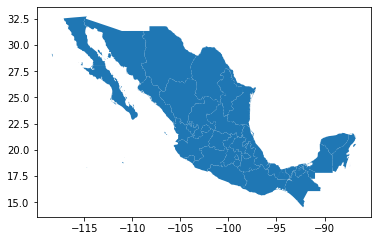

In [13]:
admin1.plot();

## Map of Population by State

Get population from COVID-19 data files

In [14]:
population_admin1 = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Defunciones_20210627.csv', 
                                usecols=['cve_ent', 'poblacion', 'nombre'])

In [15]:
population_admin1.head()

,cve_ent,poblacion,nombre
0,1,1434635,AGUASCALIENTES
1,2,3634868,BAJA CALIFORNIA
2,3,804708,BAJA CALIFORNIA SUR
3,4,1000617,CAMPECHE
4,7,5730367,CHIAPAS


Add Admin1 code column (example: convert 1 -> MX01)

In [16]:
population_admin1['ADM1_PCODE'] = population_admin1['cve_ent'].apply(lambda i: f'MX{i:02d}')

In [17]:
population_admin1.head(2)

,cve_ent,poblacion,nombre,ADM1_PCODE
0,1,1434635,AGUASCALIENTES,MX01
1,2,3634868,BAJA CALIFORNIA,MX02


Merge the boundary dataframe with the population dataframe using the ADM1_PCODE column

In [18]:
df_admin1 = admin1.merge(population_admin1, on='ADM1_PCODE')

In [19]:
df_admin1.head(2)

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry,cve_ent,poblacion,nombre
0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,None,3.993483,0.491151,"POLYGON ((-102.28787 22.41649, -102.28753 22.4...",1,1434635,AGUASCALIENTES
1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,None,29.414983,6.851318,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283...",2,3634868,BAJA CALIFORNIA


Plot population data

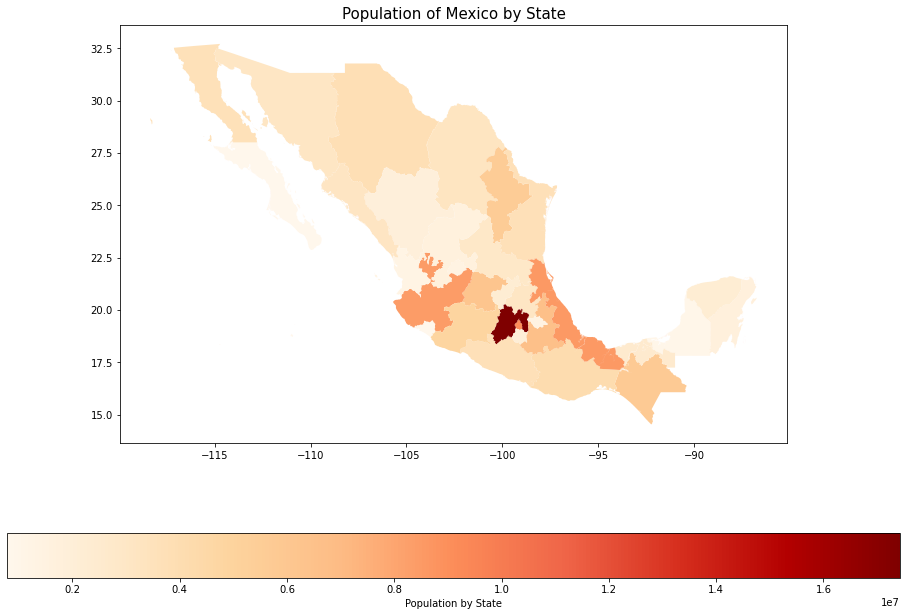

In [20]:
title = 'Population of Mexico by State'
ax1 = df_admin1.plot(column='poblacion', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Population by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);